# Code functions and documentation

In this reading, you will review some of the code from the videos using a different subset of the penguin data. This reading will also share some tips when approaching the statsmodels documentation. This is a good opportunity to review Python functionality in conjunction with exploratory data analysis, basic data cleaning, and model construction. 

## Review functions from video

### Load the dataset
The first few lines of code set up the coding environment and loaded the data. As you might be familiar with, you can call on the `import` function to import any necessary packages. You should use conventional aliases as needed. The example below references a dataset on penguins available through the `seaborn` package.

In [26]:
# Import packages
import pandas as pd
import seaborn as sns

In [27]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Clean data
After loading the data, the data was cleaned up to create a subset of data for the purposes of our course. The example isolates just the Chinstrap penguins from the dataset and drops rows with missing data.

The index of the dataframe is reset using the `reset_index()`
[function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)
. When you subset a dataframe, the original row indices are retained. For example, let’s say there were Adelie or Gentoo penguins in rows 2 and 3. By subsetting the data just for Chinstrap penguins, your new dataframe would be listed as row 1 and then row 4, as rows 2 and 3 were removed. By resetting the index of the dataframe, the row numbers become rows 1, 2, 3, etc. The data frame becomes easier to work with in the future. 

Review the code below. You are encouraged to run the code in your own notebook.

In [28]:
# Subset just Chinstrap penguins from data set
chinstrap_penguins = penguins[penguins["species"] == "Chinstrap"]
# Reset index of dataframe
chinstrap_penguins.reset_index(inplace = True, drop = True)

### Setup for model construction
Now that the data is clean, you are able to plot the data and construct a linear regression model. First, extract the one X variable, `bill_depth_mm`, and the one Y variable, `flipper_length_mm`, that you are targeting.

In [29]:
# Subset Data
ols_data = chinstrap_penguins[["bill_depth_mm", "flipper_length_mm"]]

Because this example is using statsmodels, save the ordinary least squares formula as a string so the computer can understand how to run the regression. The Y variable, `flipper_length_mm` comes first, followed by a tilde and the name for the X variable, `bill_depth_mm`.



In [30]:
# Write out formula
ols_formula = "flipper_length_mm ~ bill_depth_mm"

### Construct the model
In order to construct the model, you’ll first need to import the ols function from the `statsmodels.formula.api` interface.

In [31]:
# Import ols function
from statsmodels.formula.api import ols

Next, plug in the formula and the saved data into the `ols` function. Then, use the `fit` method to fit the model to the data. Lastly, use the `summary` method to get the results from the regression model. 



In [32]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.48
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           2.16e-07
Time:                        20:36:34   Log-Likelihood:                -215.62
No. Observations:                  68   AIC:                             435.2
Df Residuals:                      66   BIC:                             439.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       128.6967     11.623     11.073      0.000     105.492     151.902
bill_depth_mm     3.6441      0.630      5.786      0.000       2.387       4.902
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                0.837
Skew:                          -0.255   Prob(JB):                        0.658
Kurtosis:                       3.190   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

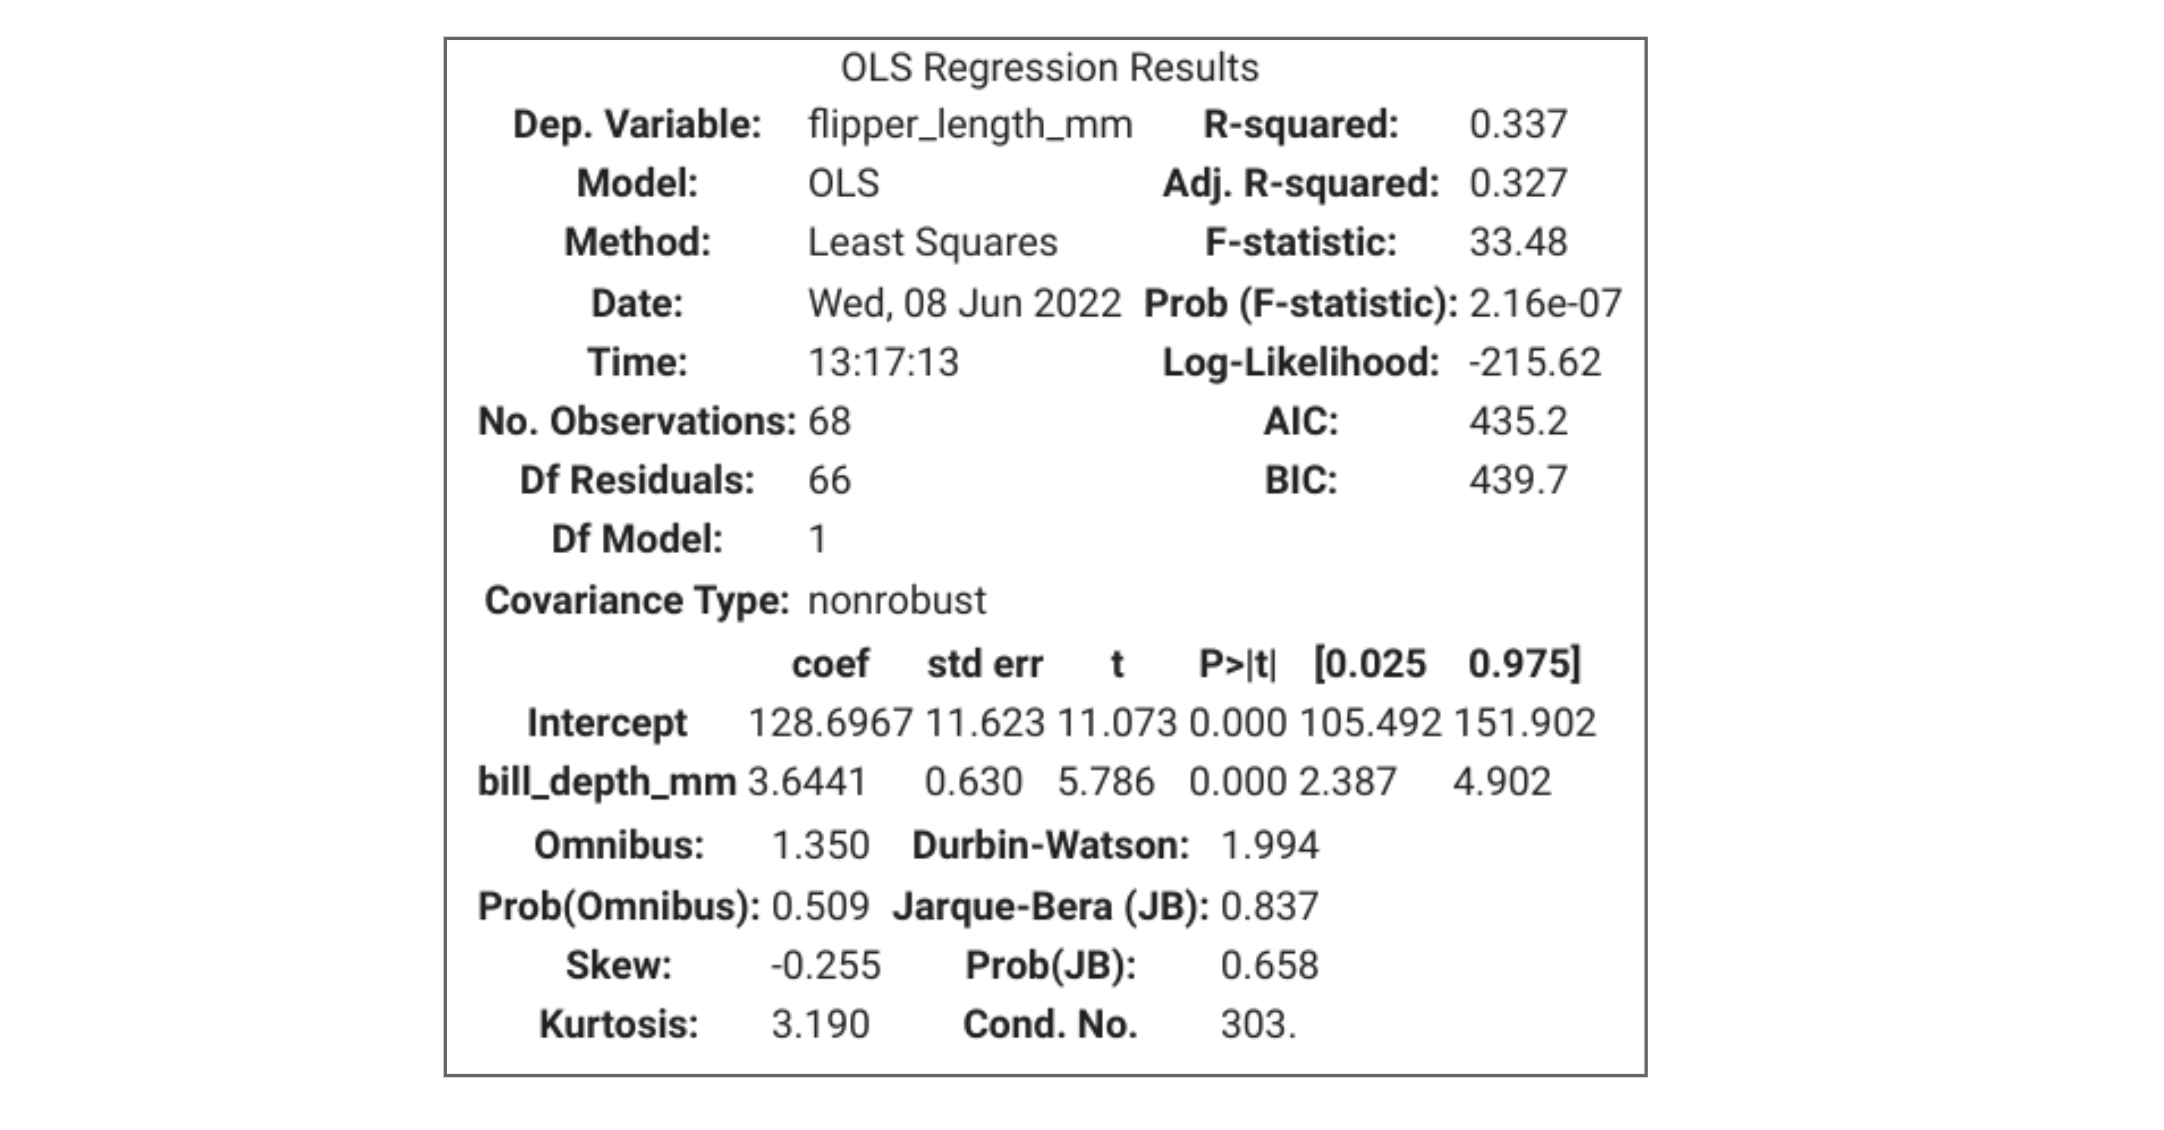

Model predictions and residuals
You can access the predictions and residuals from a fitted 
[statsmodels.regression.linear_model.OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)
 or 
[statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html)
 object as follows.

### Predictions
Use the model’s 
[predict()](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.predict.html#statsmodels.regression.linear_model.OLS.predict)
 method, passing to it an array containing the values of the independent variable(s):

In [33]:
predictions = model.predict(chinstrap_penguins[["bill_depth_mm"]])


<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

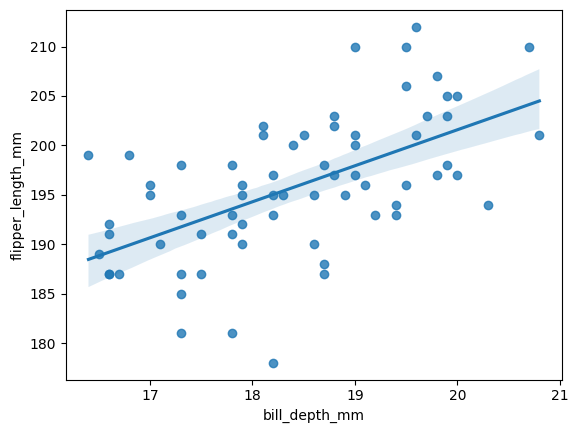

In [34]:
sns.regplot(x = "bill_depth_mm", y = "flipper_length_mm", data = ols_data)

### Residuals
Use the model’s resid attribute:

In [35]:
X = ols_data["bill_depth_mm"]

fitted_values = model.predict(X)
residuals = model.resid

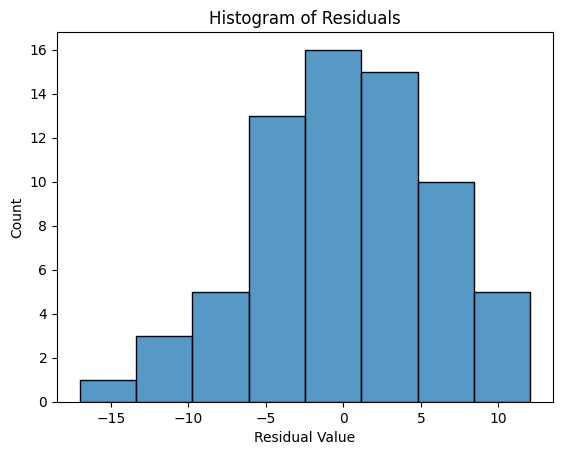

In [36]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

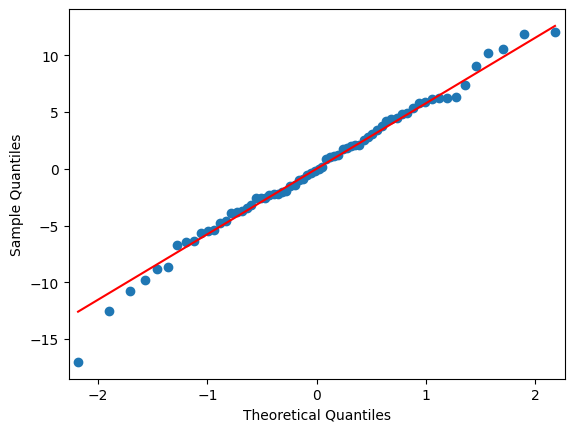

In [37]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

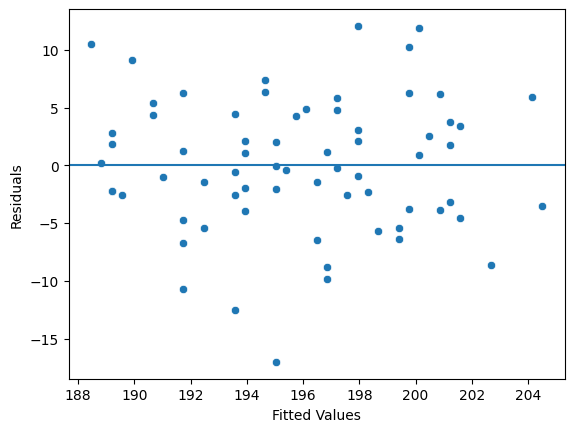

In [38]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

## Navigating statsmodels documentation
It can require significant work to approach a new Python package or a new set of Python functions, especially when first coding. The benefit of Python being an open source programming language is that there is a strong Python community asking and answering questions. Part of being a successful data professional is knowing how to make your code work and troubleshooting when your code breaks. One way to do this is to go directly to the source, or the official documentation of a particular package.

You’ve been using the `statsmodels` package to build simple linear regression models. The 
[statsmodels documentation](https://www.statsmodels.org/devel/api.html)
 is available online and is updated regularly. Specifically, you are using the 
[statsmodels.formula.api](https://www.statsmodels.org/devel/api.html#statsmodels-formula-api) interface
 to perform ordinary least squares estimation.

Examining the page on the `ols` 
[function](https://www.statsmodels.org/devel/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols)
 or the function that performs OLS estimation, you will observe the different function parameters that are allowed, with some notes about each.

Unfortunately, at this time, the statsmodels documentation does not include code examples of how to use the function. If you find documentation that doesn’t provide as many examples as you need, or documentation that doesn’t provide examples that you need to troubleshoot your code, remember that you can always search online for the function you’re trying to use and explore how others in the Python community have handled comparable problems.

## Key takeaways
- You can review this reading to refresh your memory about the code in the corresponding video.

- You can view the statsmodels (or any other package’s) documentation as needed.

- If the documentation does not hold the answer you’re looking for, you can always turn to the internet to check out other people’s work.